In [43]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import warnings
from collections import Counter
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense



In [44]:

df = pd.read_csv('bankloan.csv')

df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
df = df.dropna()
# dropping all the empty rows

In [46]:
df.isna().sum() 
# NO nan items


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
#the loanID makes no sense here , that is it's not going to help the model in any way , so it's good to drop it.

df = df.drop('Loan_ID' , axis = 1)
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [49]:
df['LoanAmount'] # multiply by 1000 to give the actual value

1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 480, dtype: float64

In [50]:
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)


In [51]:
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

### it can be seen that the data is unbalanced (high number of Y and less number of N)

# ENCODING

In [52]:
pre_target = df['Loan_Status']
pre_target

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object

In [53]:
# replacing Y with 1 and N with 0
target = pre_target.map(dict(Y = 1, N = 0))
target


1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [54]:
pre_inputs = df.drop('Loan_Status',axis=1)
pre_inputs

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71000,360.0,1.0,Rural
610,Male,Yes,3.0,Graduate,No,4106,0.0,40000,180.0,1.0,Rural
611,Male,Yes,1.0,Graduate,No,8072,240.0,253000,360.0,1.0,Urban
612,Male,Yes,2.0,Graduate,No,7583,0.0,187000,360.0,1.0,Urban


## this is where we actually encode

In [55]:
inputs = pd.get_dummies(pre_inputs) # encoding
inputs

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [77]:
sampdf = inputs.sample(20)
sampdf


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
160,0.0,1863,1041.0,98000,360.0,1.0,0,1,0,1,0,1,1,0,0,1,0
501,0.0,3159,0.0,100000,360.0,1.0,1,0,1,0,1,0,1,0,0,1,0
596,2.0,6383,1000.0,187000,360.0,1.0,0,1,0,1,0,1,0,1,1,0,0
320,0.0,2400,2167.0,115000,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0
27,2.0,4226,1040.0,110000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
470,1.0,3450,2079.0,162000,360.0,1.0,0,1,0,1,1,0,0,1,0,1,0
37,0.0,3667,1459.0,144000,360.0,1.0,1,0,0,1,1,0,1,0,0,1,0
595,0.0,3833,0.0,110000,360.0,1.0,0,1,1,0,0,1,1,0,1,0,0
471,1.0,2653,1500.0,113000,180.0,0.0,0,1,0,1,0,1,1,0,1,0,0
26,0.0,2799,2253.0,122000,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0


In [79]:
file_name = 'test.xlsx'
  
# saving the excel
sampdf.to_excel(file_name)

now , both the inputs and target df are composed of numbers which will be easy on the model

 # SMOTE SAMPLING METHOD 

In [56]:
Counter(target)
# very unbalanced

Counter({0: 148, 1: 332})

In [57]:
# when there is an unbalanced dataset, we can carry out sampling
smote = SMOTE()
X1,y = smote.fit_resample(inputs,target)
Counter(y)

Counter({0: 332, 1: 332})

In [58]:
X1.head()
#look at the range of the values

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
1,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
2,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
3,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
4,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1


# MinMaxScaler

In [59]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X1)
type(X)
X = pd.DataFrame(X)
X.head() # compare the X below and above to see what minmaxScaler has done

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.333333,0.054830,0.044567,0.201354,0.72973,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000000,0.035250,0.000000,0.096447,0.72973,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.000000,0.030093,0.069687,0.187817,0.72973,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.000000,0.072356,0.000000,0.223350,0.72973,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.666667,0.065145,0.124006,0.436548,0.72973,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


# Train the Data

In [60]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [61]:
# a NN model for classification problem

classifier = Sequential()
classifier.add(Dense(200,activation ='relu',kernel_initializer ='random_normal',input_dim=X_test.shape[1]))
classifier.add(Dense(400,activation ='relu',kernel_initializer ='random_normal'))
classifier.add(Dense(4,activation ='relu',kernel_initializer ='random_normal'))
classifier.add(Dense(1,activation ='sigmoid',kernel_initializer ='random_normal'))
classifier.compile(optimizer='adam',loss = 'binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train,y_train,batch_size=20,epochs=50,verbose= 0)
eval_model =classifier.evaluate(X_train,y_train)
eval_model

# 0.27 is the lose value and 0.88 is the accuracy 
# this is actually good

17/17 [==============================] - 0s 747us/step - loss: 0.3602 - accuracy: 0.8606


[0.3601810932159424, 0.860640287399292]

In [62]:
y_pred = classifier.predict(X_test)
print(y_pred)


[[7.0894498e-01]
 [1.3458171e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [3.1392968e-08]
 [7.0894498e-01]
 [2.1128654e-02]
 [7.0894498e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [2.3636165e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [2.2846460e-04]
 [7.0894498e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [1.2500554e-02]
 [7.0894498e-01]
 [6.2282010e-07]
 [2.0830825e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [8.0775465e-08]
 [3.1261457e-08]
 [1.8290025e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [6.3272616e-08]
 [7.0894498e-01]
 [1.3399961e-07]
 [1.0495715e-07]
 [3.3448461e-05]
 [7.0894498e-01]
 [7.0894498e-01]
 [7.0894498e-01]
 [2.4276972e-03]
 [2.9758939e-01]
 [7.0894498e-01]
 [6.8805277e-02]
 [7.0894498e-01]
 [7.0894498e-01]
 [1.1879766e-01]
 [7.0894498e-01]
 [3.5110116e-04]
 [7.0894498e-01]
 [9.1514063e-05]
 [7.0894498e-01]
 [7.0894498e-01]
 [3.6006863e-0

In [63]:
y_pred[0],y_pred[1] #to show the actual value in the y_pred array

(array([0.708945], dtype=float32), array([0.13458171], dtype=float32))

In [64]:
y_pred = (y_pred>0.5) # the values inside the array will be either true or false 

In [65]:
y_pred = y_pred.astype(int)
y_pred

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
    

[Text(0, 0.5, 'no'), Text(0, 1.5, 'yes')]

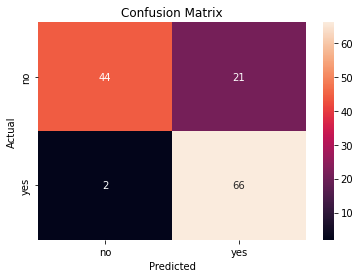

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

cm_details = plt.subplot()
sns.heatmap(cm,annot=True)

# setting the labels
cm_details.set_xlabel('Predicted') , cm_details.set_ylabel('Actual')
cm_details.set_title('Confusion Matrix')
cm_details.xaxis.set_ticklabels(['no','yes'])
cm_details.yaxis.set_ticklabels(['no','yes'])

# Preserving the MODEL 

In [67]:
classifier.save('bankLoanPredModel.h5')

In [68]:
from tensorflow import keras
import pickle
model = keras.models.load_model('bankLoanPredModel.h5')
# this is how we load the model


In [80]:
X = pd.read_excel('test.xlsx')
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1863,1041,98000,360,1,0,1,0,1,0,1,1,0,0,1,0
1,0,3159,0,100000,360,1,1,0,1,0,1,0,1,0,0,1,0
2,2,6383,1000,187000,360,1,0,1,0,1,0,1,0,1,1,0,0
3,0,2400,2167,115000,360,1,0,1,0,1,1,0,1,0,0,1,0
4,2,4226,1040,110000,360,1,0,1,0,1,0,1,1,0,0,0,1
5,1,3450,2079,162000,360,1,0,1,0,1,1,0,0,1,0,1,0
6,0,3667,1459,144000,360,1,1,0,0,1,1,0,1,0,0,1,0
7,0,3833,0,110000,360,1,0,1,1,0,0,1,1,0,1,0,0
8,1,2653,1500,113000,180,0,0,1,0,1,0,1,1,0,1,0,0
9,0,2799,2253,122000,360,1,0,1,0,1,1,0,1,0,0,1,0


In [81]:
sc = MinMaxScaler()
X_test1 = sc.fit_transform(X)

In [82]:
X_test1

array([[0.        , 0.03653285, 0.05205   , 0.12568306, 1.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.        , 0.21655786, 0.        , 0.13661202, 1.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.66666667, 0.66439783, 0.05      , 0.61202186, 1.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.11112655, 0.10835   , 0.21857923, 1.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.66666667, 0.36477289, 0.052     , 0.191256

In [84]:
y_pred = model.predict(X_test1)
y_pred = (y_pred>0.58)


In [85]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False]])

In [87]:
val = pd.DataFrame(y_pred,columns=['Status'])
val = val.replace({True:'Approved',False : 'Rejected'})
val

,Status
0,Approved
1,Approved
2,Approved
3,Approved
4,Approved
5,Approved
6,Approved
7,Rejected
8,Rejected
9,Approved
